# 외부 데이터 처리

1. 공공데이터나 오픈된 데이터를 파일로 다운 받아서 사용(csv, 엑셀, xml, json...)  
2. 웹 페이지를 읽어서 데이터 분석(그 웹 페이지 구조를 분석해야함)  

## html

In [1]:
#pip install requests
import requests
html = requests.get('https://google.com').text  #웹 요청

In [2]:
#pip install beautifulsoup4
from bs4 import BeautifulSoup

In [3]:
content = BeautifulSoup(html, 'html.parser')  #html소스를 DOM 객체화, 분석기로 html.parser 사용
title = content.html.head.title    #소스에서 html 태그 안의 head 태그 안의 title 추출
print(title)

print(title.string)  #string:태그의 텍스트 값 <태그>텍스트</태그>

<title>Google</title>
Google


### 태그 접근 방법  
1. root.html.body.h1 : 태그 한개 검색  
2. root.find(태그[속성]): 태그 1개 검색  
3. root.find_all(태그[속성]): 태그 모두 검색  
4. root.select(태그): 태그 모두 검색

In [4]:
#link = content.html.body.a  #처음 a 태그 하나만 추출
links = content.find_all('a')
links

[<a class="gb1" href="https://www.google.co.kr/imghp?hl=ko&amp;tab=wi">이미지</a>,
 <a class="gb1" href="https://maps.google.co.kr/maps?hl=ko&amp;tab=wl">지도</a>,
 <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?gl=KR&amp;tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">뉴스</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">드라이브</a>,
 <a class="gb1" href="https://www.google.co.kr/intl/ko/about/products?tab=wh" style="text-decoration:none"><u>더보기</u> »</a>,
 <a class="gb4" href="http://www.google.co.kr/history/optout?hl=ko">웹 기록</a>,
 <a class="gb4" href="/preferences?hl=ko">설정</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.com/&amp;ec=GAZAAQ" id="gb_70" target="_top">로그인</a>,
 <a href="/advanced_search?hl=ko&amp;authuser=0">고급검색</a>,
 <a 

In [5]:
for i in links:
    print(i.get_text(), ':', i['href'])  #.get_text() - 태그 안의 텍스트만 가져오기, i['href'] - href 속성 값 가져오기

이미지 : https://www.google.co.kr/imghp?hl=ko&tab=wi
지도 : https://maps.google.co.kr/maps?hl=ko&tab=wl
Play : https://play.google.com/?hl=ko&tab=w8
YouTube : https://www.youtube.com/?gl=KR&tab=w1
뉴스 : https://news.google.com/?tab=wn
Gmail : https://mail.google.com/mail/?tab=wm
드라이브 : https://drive.google.com/?tab=wo
더보기 » : https://www.google.co.kr/intl/ko/about/products?tab=wh
웹 기록 : http://www.google.co.kr/history/optout?hl=ko
설정 : /preferences?hl=ko
로그인 : https://accounts.google.com/ServiceLogin?hl=ko&passive=true&continue=https://www.google.com/&ec=GAZAAQ
고급검색 : /advanced_search?hl=ko&authuser=0
광고 프로그램 : /intl/ko/ads/
비즈니스 솔루션 : http://www.google.co.kr/intl/ko/services/
Google 정보 : /intl/ko/about.html
Google.co.kr : https://www.google.com/setprefdomain?prefdom=KR&prev=https://www.google.co.kr/&sig=K_dZ3UEaSQL-U4dhlSCJsTvSAJ4EE%3D
개인정보처리방침 : /intl/ko/policies/privacy/
약관 : /intl/ko/policies/terms/


In [6]:
html = '<html><body><p class=a>aaa</p><p class=b>bbb</p><p class=a>ccc</p><p class=a id=xxx>ddd</p></body></html>'
root = BeautifulSoup(html, 'html.parser') 
p1 = root.find_all('p')
print('p1:', p1)
p2 = root.find_all('p', {'class':'a'})
print('p2:', p2)
p3 = root.find_all('p', {'class':'b'})
print('p3:', p3)
p4 = root.find('p', {'class':'a'})
print('p4:', p4)
p5 = root.select('p')
print('p5:', p5)
p6 = root.select('p.a') #태그.클래스명 //태그#id명
print('p6:', p6)
p7 = root.select('p.b')
print('p7:', p7)
p8 = root.select('p#xxx')   # '#' = id
print('p8:', p8)

p1: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p2: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p3: [<p class="b">bbb</p>]
p4: <p class="a">aaa</p>
p5: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p6: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p7: [<p class="b">bbb</p>]
p8: [<p class="a" id="xxx">ddd</p>]


## XML

In [7]:
html = requests.get('http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp').text  #웹 요청
#html=html.decode('utf-8')
#지역별 일간 날씨를 출력

In [8]:
root = BeautifulSoup(html, 'html.parser') 
loc = root.find_all('location')
for i in loc:
    print(i.city.get_text(), '지역 날씨========')
    d = i.find_all('data')
    for j in d:
        print(j.tmef.string , ':', j.wf.string, '/ 최고온도:', j.tmx.string)

서울 지역 날씨========
2021-07-05 00:00 : 구름많음 / 최고온도: 29
2021-07-05 12:00 : 구름많음 / 최고온도: 29
2021-07-06 00:00 : 흐림 / 최고온도: 29
2021-07-06 12:00 : 흐림 / 최고온도: 29
2021-07-07 00:00 : 흐림 / 최고온도: 29
2021-07-07 12:00 : 흐림 / 최고온도: 29
2021-07-08 00:00 : 흐리고 비 / 최고온도: 28
2021-07-08 12:00 : 흐리고 비 / 최고온도: 28
2021-07-09 00:00 : 흐리고 비 / 최고온도: 29
2021-07-09 12:00 : 흐리고 비 / 최고온도: 29
2021-07-10 00:00 : 흐림 / 최고온도: 29
2021-07-11 00:00 : 흐리고 비 / 최고온도: 28
2021-07-12 00:00 : 흐리고 비 / 최고온도: 28
인천 지역 날씨========
2021-07-05 00:00 : 구름많음 / 최고온도: 26
2021-07-05 12:00 : 구름많음 / 최고온도: 26
2021-07-06 00:00 : 흐림 / 최고온도: 28
2021-07-06 12:00 : 흐림 / 최고온도: 28
2021-07-07 00:00 : 흐림 / 최고온도: 27
2021-07-07 12:00 : 흐림 / 최고온도: 27
2021-07-08 00:00 : 흐리고 비 / 최고온도: 28
2021-07-08 12:00 : 흐리고 비 / 최고온도: 28
2021-07-09 00:00 : 흐리고 비 / 최고온도: 27
2021-07-09 12:00 : 흐리고 비 / 최고온도: 27
2021-07-10 00:00 : 흐림 / 최고온도: 27
2021-07-11 00:00 : 흐리고 비 / 최고온도: 27
2021-07-12 00:00 : 흐리고 비 / 최고온도: 27
수원 지역 날씨========
2021-07-05 00:00 : 구름많음 / 최고온도: 29
2021-07-05 1

2021-07-07 12:00 : 흐리고 비 / 최고온도: 29
2021-07-08 00:00 : 흐리고 비 / 최고온도: 29
2021-07-08 12:00 : 흐리고 비 / 최고온도: 29
2021-07-09 00:00 : 흐리고 비 / 최고온도: 28
2021-07-09 12:00 : 흐리고 비 / 최고온도: 28
2021-07-10 00:00 : 흐리고 비 / 최고온도: 28
2021-07-11 00:00 : 흐림 / 최고온도: 28
2021-07-12 00:00 : 흐림 / 최고온도: 28
진주 지역 날씨========
2021-07-05 00:00 : 흐리고 비 / 최고온도: 27
2021-07-05 12:00 : 흐리고 비 / 최고온도: 27
2021-07-06 00:00 : 흐리고 비 / 최고온도: 27
2021-07-06 12:00 : 흐리고 비 / 최고온도: 27
2021-07-07 00:00 : 흐리고 비 / 최고온도: 29
2021-07-07 12:00 : 흐리고 비 / 최고온도: 29
2021-07-08 00:00 : 흐리고 비 / 최고온도: 29
2021-07-08 12:00 : 흐리고 비 / 최고온도: 29
2021-07-09 00:00 : 흐리고 비 / 최고온도: 29
2021-07-09 12:00 : 흐리고 비 / 최고온도: 29
2021-07-10 00:00 : 흐리고 비 / 최고온도: 29
2021-07-11 00:00 : 흐림 / 최고온도: 28
2021-07-12 00:00 : 흐림 / 최고온도: 29
거창 지역 날씨========
2021-07-05 00:00 : 흐리고 비 / 최고온도: 29
2021-07-05 12:00 : 흐리고 비 / 최고온도: 29
2021-07-06 00:00 : 흐리고 비 / 최고온도: 27
2021-07-06 12:00 : 흐리고 비 / 최고온도: 27
2021-07-07 00:00 : 흐리고 비 / 최고온도: 28
2021-07-07 12:00 : 흐리고 비 / 최고온도: 28
2021-0

## JSON

In [9]:
import json
j = '[{"id":"aaa", "pwd":"111"},{"id":"bbb", "pwd":"222"}]'#json 데이터

items = json.loads(j)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print(item['id'], ':', item['pwd'])

aaa : 111
bbb : 222


In [10]:
j = '['
j += '{"info":{"id":"aaa", "pwd":"111"}, "colors":["red", "blue", "yellow"]},'
j += '{"info":{"id":"bbb", "pwd":"222"}, "colors":["cyan", "magenta", "yellow", "black"]}'
j += ']'

items = json.loads(j)
for item in items:
    info = item['info']
    arr = item['colors']
    print(info['id'], ':', info['pwd'])
    for a in arr:
        print(a, end=', ')
    print()

aaa : 111
red, blue, yellow, 
bbb : 222
cyan, magenta, yellow, black, 


In [11]:
html = requests.get('https://api.github.com/repositories').text
items = json.loads(html)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print('id:', item['id'], ' / ', 'name:', item['name'], ' / ', 'login:', item['owner']['login'])

id: 1  /  name: grit  /  login: mojombo
id: 26  /  name: merb-core  /  login: wycats
id: 27  /  name: rubinius  /  login: rubinius
id: 28  /  name: god  /  login: mojombo
id: 29  /  name: jsawesome  /  login: vanpelt
id: 31  /  name: jspec  /  login: wycats
id: 35  /  name: exception_logger  /  login: defunkt
id: 36  /  name: ambition  /  login: defunkt
id: 42  /  name: restful-authentication  /  login: technoweenie
id: 43  /  name: attachment_fu  /  login: technoweenie
id: 48  /  name: microsis  /  login: caged
id: 52  /  name: s3  /  login: anotherjesse
id: 53  /  name: taboo  /  login: anotherjesse
id: 54  /  name: foxtracs  /  login: anotherjesse
id: 56  /  name: fotomatic  /  login: anotherjesse
id: 61  /  name: glowstick  /  login: mojombo
id: 63  /  name: starling  /  login: defunkt
id: 65  /  name: merb-more  /  login: wycats
id: 68  /  name: thin  /  login: macournoyer
id: 71  /  name: resource_controller  /  login: jamesgolick
id: 73  /  name: markaby  /  login: jamesgolick
i

## Excel 파일 실시간 다운(갱신) 사용

In [12]:
#pip install lxml
import pandas as pd

def get_code(name):
    a = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', index_col='회사명')[0]
    code = a.loc[name, '종목코드']
    code = '{:0=6d}'.format(code)  #종목코드를 6자리로 맞춰서 반환 (6자리가 안될 경우 앞자리를 0으로 채움)
    return code
                
get_code('삼성전자')

'005930'

In [14]:
def get_stock_info(code):
    url = 'https://finance.naver.com/item/sise_day.nhn?code='+code
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) \
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'} 
    html = requests.get(url, headers = headers)
    html = BeautifulSoup(html.text, 'lxml')
    html_table = html.select('table')
    table = pd.read_html(str(html_table))
    a = table[0].dropna()
    return a

code = get_code('삼성전자')
info = get_stock_info(code)
info

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.07.02,80000.0,100.0,80000.0,80400.0,79900.0,8181692.0
2,2021.07.01,80100.0,600.0,80500.0,80600.0,80000.0,13382882.0
3,2021.06.30,80700.0,300.0,81100.0,81400.0,80700.0,13288643.0
4,2021.06.29,81000.0,900.0,81900.0,82100.0,80800.0,15744317.0
5,2021.06.28,81900.0,300.0,81700.0,82000.0,81600.0,11578529.0
9,2021.06.25,81600.0,400.0,81500.0,81900.0,81200.0,13481405.0
10,2021.06.24,81200.0,1100.0,80400.0,81400.0,80100.0,18771080.0
11,2021.06.23,80100.0,100.0,80500.0,80600.0,79900.0,13856548.0
12,2021.06.22,80000.0,100.0,80200.0,80300.0,79900.0,11773365.0
13,2021.06.21,79900.0,600.0,79700.0,80000.0,79600.0,16063340.0


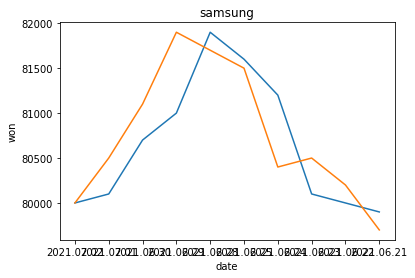

In [15]:
import matplotlib.pyplot as plt

plt.plot(info['날짜'], info['종가'])
plt.plot(info['날짜'], info['시가'])
plt.title('samsung')
plt.xlabel('date')
plt.ylabel('won')
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as tk

x=np.arange(1, 10, 1)
y=2*x**2
fig = Figure(figsize=(10, 7), dpi=100)  #그리프 그릴 창 생성
fig.add_subplot(1,1,1).plot(x, y)#창에 그래프 하나 추가

window = tk.Tk()  #Tk 객체 생성. 기본 윈도우 객체
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()
window.mainloop()


## 실습

sbs 연예뉴스 타이틀 가져오기

In [17]:
#By Me
sbs_entnews = requests.get('https://ent.sbs.co.kr/news/flash.do?plink=GNB&cooper=SBSENTERNEWS').text
content = BeautifulSoup(sbs_entnews, 'html.parser')
titles = content.select('h3.nwl_title')
dates = content.select('div.nwl_subtext')
reporters = content.select('em.nwl_reporter')
for title, date, reporter in zip(titles, dates, reporters):
    print(f'{title.get_text()} / 날짜:{date.get_text()} / 작성자:{reporter.get_text()}')

[스브스夜] '펜트하우스3' 김소연, 딸 구한 유진 살해…"결국 내가 이겼어 오윤희, 잘가" / 날짜:2021.07.02 23:56 / 작성자:김효정 에디터
'펜트하우스3' 유진 죽음에 이지아, "나만 두고 가면 어떡해, 내가 미안해" 오열 / 날짜:2021.07.02 23:11 / 작성자:김효정 에디터
'랑종' 나홍진 "귀신은 분명 있다…겁 많아 공포물 잘 못 봐" / 날짜:2021.07.02 18:21 / 작성자:김지혜 기자
'랑종' 나홍진 "수위 때문에 감독과 많이 다퉜다…내가 말려서 이 정도" / 날짜:2021.07.02 18:21 / 작성자:김지혜 기자
'랑종' 감독 "나홍진 감독은 아이돌, 공동 작업 상상도 못 해" / 날짜:2021.07.02 18:20 / 작성자:김지혜 기자
한국 나홍진X태국 반종은 어떻게 시너지를 냈나…'랑종'의 제작기 / 날짜:2021.07.02 18:20 / 작성자:김지혜 기자
이이경, 자가격리 김영철 대신 '철파엠' 스페셜 DJ 출격 / 날짜:2021.07.02 18:19 / 작성자:강선애 기자
'제2의 전성기' 탁재훈, SBS '상반기 프로그램 평가 심의' 특별상 수상 / 날짜:2021.07.02 16:21 / 작성자:강선애 기자
송중기, 코로나19 확진자 밀접 접촉…"검사는 음성, 자가격리 돌입" / 날짜:2021.07.02 16:20 / 작성자:강선애 기자
'강철부대' 박중사, 불법촬영 유포 혐의 입건 / 날짜:2021.07.02 16:19 / 작성자:강경윤 기자
'펜트하우스3' 엄기준 손아귀에 들어간 안연홍… 섬뜩한 '밧줄 결박' 현장 / 날짜:2021.07.02 15:27 / 작성자:강선애 기자
"이런 무대 보려 '라우드' 한 것"…박진영X싸이 극찬한 무대는? / 날짜:2021.07.02 14:51 / 작성자:강선애 기자
[단독] "더이상은 못 참겠다"...건축주 송중기에 쏟아지는 민원 / 날짜:2021.07.02 14:46 / 작성자:강경윤 기자
문채원, '미우새' MC들의 짓궂은 상황극에 "나 약올려?" / 날

In [18]:
#Better Way
url = 'https://ent.sbs.co.kr/news/flash.do?plink=GNB&cooper=SBSENTERNEWS'
html = requests.get(url).text
root = BeautifulSoup(sbs_entnews, 'html.parser')
divs = root.select('div.w_nwl_text')
for i in divs:
    title = i.select('h3')[0].text
    print('Title:', title)
    text = i.select('div.nwl_text')[0].text
    print('Text:', text)
    writer = i.select('em.nwl_reporter')[0].text
    print('Writer:', writer)
    date = i.select('div.nwl_subtext')[0].text
    print('Date:', date)
    print('============================')

Title: [스브스夜] '펜트하우스3' 김소연, 딸 구한 유진 살해…"결국 내가 이겼어 오윤희, 잘가"
Text: 유진을 절벽 아래로 떨어뜨린 것은 김소연이었다. 2일 방송된 SBS 금요드라마 '펜트하우스3'에서는 오윤희 사망의 전말이 드러났다. 이날 방송에서 심수련은 오윤희를 그리워하며 그가 선물했던 책을 떠올렸다.
Writer: 김효정 에디터
Date: 2021.07.02 23:56
Title: '펜트하우스3' 유진 죽음에 이지아, "나만 두고 가면 어떡해, 내가 미안해" 오열
Text: 오윤희는 부활할까? 2일 방송된 SBS 금요드라마 '펜트하우스3'에서는 시신으로 발견된 오윤희의 모습이 그려졌다. 이날 방송에서 하윤철은 오윤희가 시신으로 발견됐다는 뉴스를 보고 충격을 감추지 못했다.
Writer: 김효정 에디터
Date: 2021.07.02 23:11
Title: '랑종' 나홍진 "귀신은 분명 있다…겁 많아 공포물 잘 못 봐"
Text: 나홍진 감독이 "귀신은 분명 있다"는 확신에 찬 견해를 밝혔다. 2일 오후 서울 용산 CGV에서 열린 영화 '랑종' 기자간담회에는 제작자로 첫 발을 뗀 나홍진 감독과 연출을 맡은 태국의 반종 피산다나쿤이 참석했다.
Writer: 김지혜 기자
Date: 2021.07.02 18:21
Title: '랑종' 나홍진 "수위 때문에 감독과 많이 다퉜다…내가 말려서 이 정도"
Text: 나홍진 감독이 영화 '랑종'을 제작하며 연출자인 반종 피산다나쿤 감독과 '수위'를 두고 적잖은 갈등을 겪었다고 밝혔다. 2일 오후 서울 용산 CGV에서 열린 영화 '랑종' 기자간담회에 참석한 나홍진 감독은 "근친, 식인 등 금기를 넘어서는 장면이 거침없이 등장하는 영화의 수위에 대해 고민이 없었냐"는 질문에 "믿지 않으실 수도 있지만 저는 감독님을 말렸다"고 운을 뗐다.
Writer: 김지혜 기자
Date: 2021.07.02 18:21
Title: '랑종' 감독 "나홍진 감독은 아이돌, 공동 작업 상상도 못 해"
Text: 태국 최고의 상업영화